# Does school funding impact students academic performance?

<img src="images/education-header.jpg" width="900" />



**Credit:**  [techxend](https://www.techxtend.com/site/content/education/) 

In [465]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import scipy.stats as st

#sns.set_theme(style="ticks", color_codes=True)


warnings.filterwarnings("ignore")  # Suppress all warnings

In [466]:
# read file
df = pd.read_csv('schools_final_economic_merged.csv', index_col = 0)
df.head()

School Name       District Name  District Code_x  \
67    A. E. ARNOLD ELEMENTARY  CYPRESS ELEMENTARY         610440.0   
66    A. E. ARNOLD ELEMENTARY  CYPRESS ELEMENTARY         610440.0   
68    A. E. ARNOLD ELEMENTARY  CYPRESS ELEMENTARY         610440.0   
69    A. E. ARNOLD ELEMENTARY  CYPRESS ELEMENTARY         610440.0   
5359  A. E. ARNOLD ELEMENTARY  CYPRESS ELEMENTARY         610440.0   

      Total Enrollment  Full-Time Equivalent (FTE) Teachers  \
67               756.0                                 28.0   
66               756.0                                 28.0   
68               756.0                                 28.0   
69               756.0                                 28.0   
5359             756.0                                 28.0   

      Pupil/Teacher Ratio  Total Revenue (TOTALREV) per Pupil   \
67                   27.0                              11980.0   
66                   27.0                              11980.0   
68                   27.0                              11980.0   
69                   27.0                              11980.0   
5359                 27.0                              11980.0   

      Total Revenue - Local Sources (TLOCREV) per Pupil   \
67                                               6149.0    
66                                               6149.0    
68                                               6149.0    
69                                               6149.0    
5359                                             6149.0    

      Total Revenue - State Sources (TSTREV) per Pupil  \
67                                              5210.0   
66                                              5210.0   
68                                              5210.0   
69                                              5210.0   
5359                                            5210.0   

      Total Revenue - Federal Sources (TFEDREV) per Pupil     ...     \
67                                                622.0       ...      
66                                                622.0       ...      
68                                                622.0       ...      
69                                                622.0       ...      
5359                                              622.0       ...      

      CAASPP Reported Enrollment  Students Tested  Students with Scores  \
67                         118.0            111.0                 111.0   
66                         118.0            116.0                 116.0   
68                          28.0             28.0                  28.0   
69                          28.0             28.0                  28.0   
5359                        78.0             76.0                  76.0   

      Total Standard Exceeded  Total Standard Met  \
67                       48.0                36.0   
66                       60.0                32.0   
68                       13.0                10.0   
69                       17.0                 5.0   
5359                     11.0                24.0   

      Total Standard Met and Above  Total Standard Nearly Met  \
67                            84.0                       16.0   
66                            92.0                       20.0   
68                            23.0                        0.0   
69                            22.0                        5.0   
5359                          35.0                       26.0   

      Total Standard Not Met      Disadvantaged  Zip Code  
67                      11.0  Not Disadvantaged     90630  
66                       4.0  Not Disadvantaged     90630  
68                       5.0      Disadvantaged     90630  
69                       1.0      Disadvantaged     90630  
5359                    15.0      Disadvantaged     90630  

[5 rows x 39 columns]

In [467]:
# columns present on the dataset
df.columns

Index(['School Name', 'District Name', 'District Code_x', 'Total Enrollment',
       'Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
       'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       '

In [468]:
#Converting all the assessment columns back to  percentage columns for exceeded, nearly met, not met to show completion results as percentage of test taken
df['Percentate Std Exceed'] =(df['Total Standard Exceeded']/df['Students Tested']*100).round(decimals=0)
df['Percentage Std Met'] =(100*df['Total Standard Met']/df['Students Tested']).round(decimals=0)
df['Percentage Std Nearly Met'] =(100*df['Total Standard Nearly Met']/df['Students Tested']).round(decimals=0)
df['Percentage Std Not Met'] =(100*df['Total Standard Not Met']/df['Students Tested']).round(decimals=0)
df['Percentage Std Met and Above'] =(100*df['Total Standard Met and Above']/df['Students Tested']).round(decimals=0)
#Percentage was multiplied by the students tested information and not the total enrollment information.
#Students tested in Math and Literacy can be the same students or different students, we don't have that information.
#we are adding the results of both exams, this can cause a duplicate in value of students tested, I will separate both datasets

In [469]:
df['Pass'] = df['Percentate Std Exceed'] + df['Percentage Std Met']
df['Fail'] = df['Percentage Std Nearly Met'] + df['Percentage Std Not Met']

In [470]:
# columns present on the dataset
df.columns

Index(['School Name', 'District Name', 'District Code_x', 'Total Enrollment',
       'Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
       'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       '

In [471]:
# checking unique ethinicities present in subgroup ID 
df['Subgroup ID'].unique()

array(['Asian or Asian/Pacific Islander', 'Hispanic', 'White',
       'Two or More Races', 'Black', 'Hawaiian Nat./Pacific Isl.',
       'American Indian/Alaska Native'], dtype=object)

In [100]:
# filtering based on total enrollment
#df = df[df['Total Enrollment'] != 0]
#df = df[df['Total Enrollment'] > 250]

# need to filter out the 6 schools that have more students tested than enrolled

In [472]:
# checking total enrollment data
# we see that there's a wide number of students per district. 
# the smallest district has 251 students and the largest over 630,000 students
df.describe()

District Code_x  Total Enrollment  Full-Time Equivalent (FTE) Teachers  \
count     43452.000000      43452.000000                         43452.000000   
mean     622500.813265        905.192396                            37.710549   
std       15136.270570        646.891603                            26.477975   
min      600006.000000          0.000000                             0.000000   
25%      610890.000000        508.000000                            21.000000   
50%      622710.000000        694.000000                            28.800000   
75%      633840.000000       1034.000000                            43.410000   
max      691136.000000       5279.000000                           191.620000   

       Pupil/Teacher Ratio  Total Revenue (TOTALREV) per Pupil   \
count         43452.000000                         43452.000000   
mean             23.846629                         13822.615622   
std               4.733462                          7005.255426   
min               0.000000                             0.000000   
25%              22.250000                         12151.000000   
50%              24.090000                         13227.000000   
75%              25.732500                         14345.000000   
max             325.000000                        369640.000000   

       Total Revenue - Local Sources (TLOCREV) per Pupil   \
count                                       43452.000000    
mean                                         5098.525108    
std                                          4028.688196    
min                                             0.000000    
25%                                          2958.000000    
50%                                          4397.000000    
75%                                          6363.000000    
max                                        189662.000000    

       Total Revenue - State Sources (TSTREV) per Pupil  \
count                                      43452.000000   
mean                                        7644.634930   
std                                         3870.093485   
min                                            0.000000   
25%                                         5715.000000   
50%                                         7802.000000   
75%                                         9525.000000   
max                                       115842.000000   

       Total Revenue - Federal Sources (TFEDREV) per Pupil   \
count                                       43452.000000      
mean                                         1079.400304      
std                                          1743.042981      
min                                             0.000000      
25%                                           587.000000      
50%                                           897.000000      
75%                                          1300.000000      
max                                        106213.000000      

       Total Current Expenditures - Instruction (TCURINST) per Pupil   \
count                                       43452.000000                
mean                                         6956.991945                
std                                          1667.229482                
min                                             0.000000                
25%                                          6456.000000                
50%                                          6935.000000                
75%                                          7445.000000                
max                                         74161.000000                

       Total Current Expenditures - Support Services (TCURSSVC) per Pupil   \
count                                       43452.000000                     
mean                                         4106.006030                     
std                                          2324.443981                     
min                                             0.000

In [476]:
df['Mean Scale Score'].describe()

count    43452.000000
mean      2513.870991
std         77.432698
min       2295.200000
25%       2453.400000
50%       2508.316667
75%       2565.300000
max       2815.600000
Name: Mean Scale Score, dtype: float64

In [477]:
# checking revenue per student data
# we see that the average capiutal per student is around 9640
# the minimum is 0 and the max capital per student is over 77000 clearly an outlier - we need to fix these
df['Total Revenue (TOTALREV) per Pupil '].describe()

count     43452.000000
mean      13822.615622
std        7005.255426
min           0.000000
25%       12151.000000
50%       13227.000000
75%       14345.000000
max      369640.000000
Name: Total Revenue (TOTALREV) per Pupil , dtype: float64

In [478]:
# dataset containing school districts with over $20,000 revenue per student
df_high_funding = df[(df['Total Revenue (TOTALREV) per Pupil '] > 20_000)]

# update the main dataset to not include schools with over 20k revenue per student nor zero revenue per student
df = df[(df['Total Revenue (TOTALREV) per Pupil '] < 20_000)]
df = df[(df['Total Revenue (TOTALREV) per Pupil '] != 0)]

print(df_high_funding.shape)


(1093, 46)


In [479]:
df_high_funding['District Name'].unique()

array(['ORANGE COUNTY DEPARTMENT OF EDUCATION', 'PALO ALTO UNIFIED',
       'SANTA CLARA UNIFIED', 'EMERY UNIFIED', 'JEFFERSON ELEMENTARY',
       'SAN MATEO UNION HIGH', 'MOUNT PLEASANT ELEMENTARY',
       'VAL VERDE UNIFIED', 'BAKER VALLEY UNIFIED', 'BAYSHORE ELEMENTARY',
       'BEVERLY HILLS UNIFIED', 'LAWNDALE ELEMENTARY', 'TAFT UNION HIGH',
       'COAST UNIFIED', 'CARMEL UNIFIED', 'SEQUOIA UNION HIGH',
       'LOS ANGELES COUNTY OFFICE OF EDUCATION',
       'EL DORADO COUNTY OFFICE OF EDUCATION', 'COLD SPRING ELEMENTARY',
       'RIVERSIDE COUNTY OFFICE OF EDUCATION', 'PORTOLA VALLEY ELEMENTARY',
       'HILLSBOROUGH CITY ELEMENTARY', 'BYRON UNION ELEMENTARY',
       'LAGUNA BEACH UNIFIED', 'SACRAMENTO COUNTY OFFICE OF EDUCATION',
       'VENTURA COUNTY OFFICE OF EDUCATION',
       'STANISLAUS COUNTY OFFICE OF EDUCATION', 'JULIAN UNION HIGH',
       'JUNCTION ELEMENTARY', 'KENWOOD', 'KERN COUNTY OFFICE OF EDUCATION',
       'LAS LOMITAS ELEMENTARY', 'TULARE COUNTY OFFICE OF EDUC

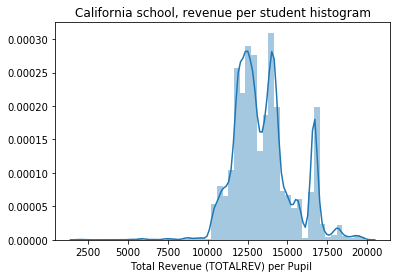

In [480]:
plt.figure(figsize=(6,4))
sns.distplot(df['Total Revenue (TOTALREV) per Pupil '])
plt.title('California school, revenue per student histogram')
plt.show()

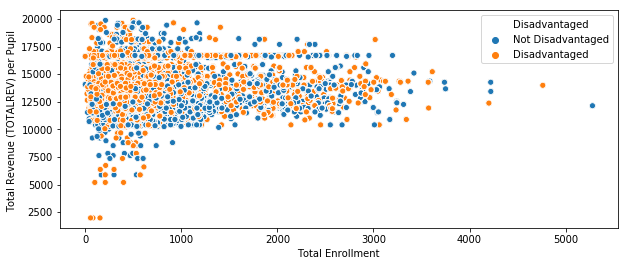

In [481]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Total Enrollment', y='Total Revenue (TOTALREV) per Pupil ', hue='Disadvantaged',data=df)
plt.show()

In [482]:
#Correlaiton of revenue sources Vs Scores and Pass Fail
corr_columns = ['School Name', 'District Name', 'District Code_x',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

In [483]:
#Correlation of expenditures with scores
corr_columns = ['School Name', 'District Name', 'District Code_x','Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
                'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

In [484]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.4f} + {:.4f}x'.format(a, b))

    return a, b

best fit line:
y = 2544.6113 + -0.0023x


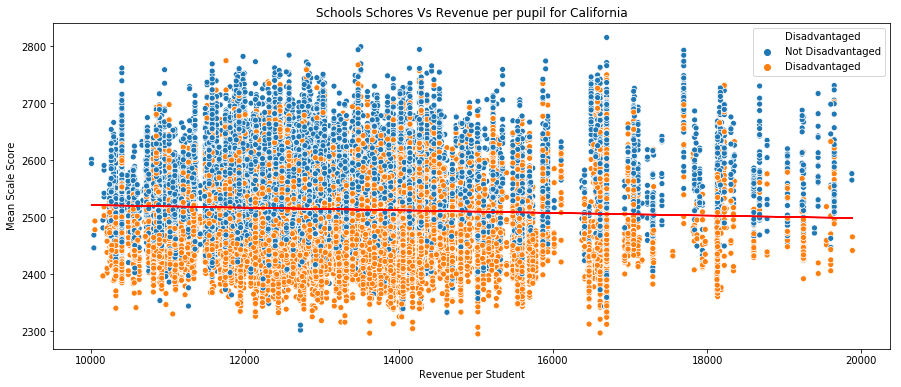

In [485]:
df_revenue=df[df['Total Revenue (TOTALREV) per Pupil ']>=10000]
a, b = best_fit(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'],hue=df_revenue['Disadvantaged'])
yfit = [a + b * xi for xi in df_revenue['Total Revenue (TOTALREV) per Pupil ']]
plt.plot(df_revenue['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
plt.title('Schools Schores Vs Revenue per pupil for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

best fit line:
y = 2544.6113 + -0.0023x


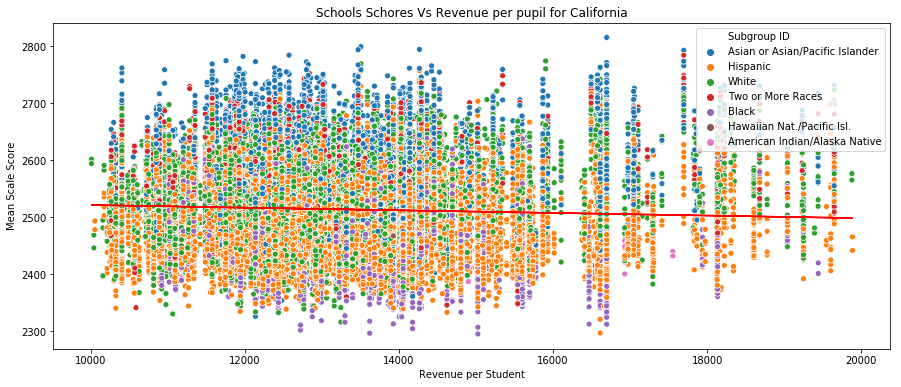

In [486]:
#We are looking at the schools and were are they in the revenue/score comparison
df_revenue=df[df['Total Revenue (TOTALREV) per Pupil ']>=10000]
a, b = best_fit(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'],hue=df_revenue['Subgroup ID'])
yfit = [a + b * xi for xi in df_revenue['Total Revenue (TOTALREV) per Pupil ']]
plt.plot(df_revenue['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
plt.title('Schools Schores Vs Revenue per pupil for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

## Compare scores with Total Enrollment of schools, on the correlation, there seems to be a positive correlation.

best fit line:
y = 2457.4674 + 0.0615x


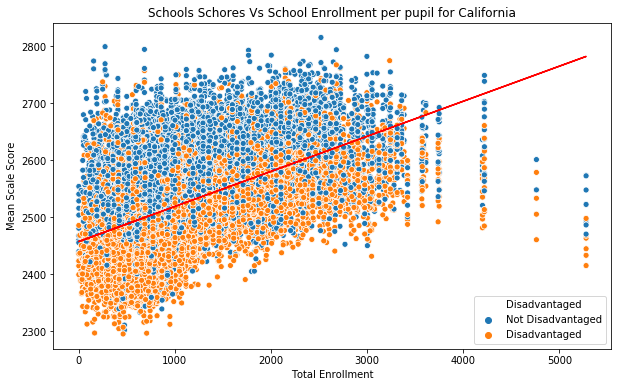

In [487]:
a, b = best_fit(df['Total Enrollment'],df['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df['Total Enrollment'],df['Mean Scale Score'], hue=df['Disadvantaged'])
yfit = [a + b * xi for xi in df['Total Enrollment']]
plt.plot(df['Total Enrollment'], yfit, color='red')
plt.title('Schools Schores Vs School Enrollment per pupil for California')
plt.xlabel('Total Enrollment')
_=plt.ylabel('Mean Scale Score')

best fit line:
y = 2457.4674 + 0.0615x


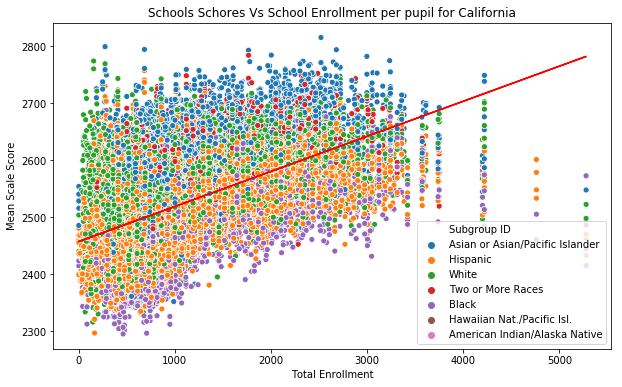

In [488]:
a, b = best_fit(df['Total Enrollment'],df['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df['Total Enrollment'],df['Mean Scale Score'], hue=df['Subgroup ID'])
yfit = [a + b * xi for xi in df['Total Enrollment']]
plt.plot(df['Total Enrollment'], yfit, color='red')
plt.title('Schools Schores Vs School Enrollment per pupil for California')
plt.xlabel('Total Enrollment')
_=plt.ylabel('Mean Scale Score')

## Teacher/Student Ratio also showed a positive correlation, let's look at it

best fit line:
y = 2491.7480 + 0.9067x


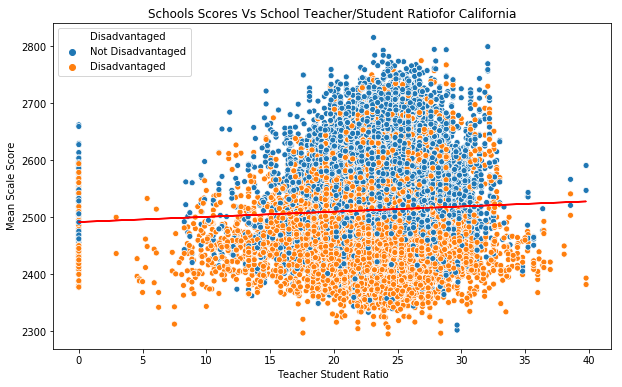

In [489]:
df_ts=df[df['Pupil/Teacher Ratio']<40]
a, b = best_fit(df_ts['Pupil/Teacher Ratio'],df_ts['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df_ts['Pupil/Teacher Ratio'],df_ts['Mean Scale Score'], hue=df_ts['Disadvantaged'])
yfit = [a + b * xi for xi in df_ts['Pupil/Teacher Ratio']]
plt.plot(df_ts['Pupil/Teacher Ratio'], yfit, color='red')
plt.title('Schools Scores Vs School Teacher/Student Ratiofor California')
plt.xlabel('Teacher Student Ratio')
_=plt.ylabel('Mean Scale Score')

## It would seem that being Economically Disadvantaged has a high impact on success, we will separate the dataset on Disadvantaged and non Disadvantaged to see the mpact of other factors, like revenue

In [490]:
df_dis= df[df['Disadvantaged']=='Disadvantaged']
df_notDis = df[df['Disadvantaged']=='Not Disadvantaged']

best fit line:
y = 2498.6821 + -0.0013x


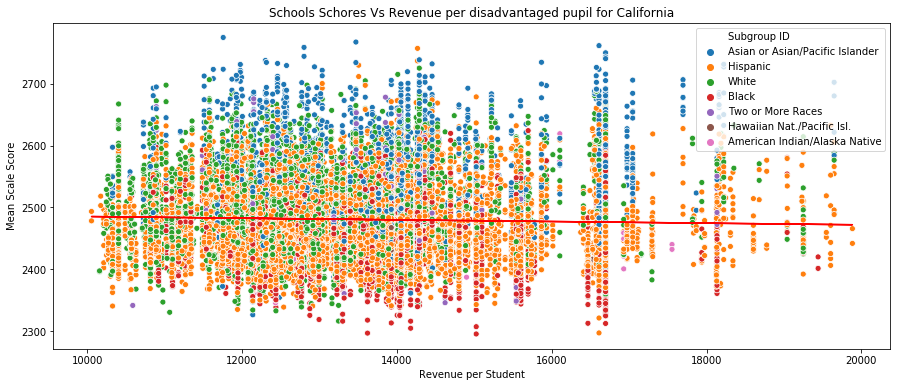

In [491]:
df_dis_r=df_dis[df_dis['Total Revenue (TOTALREV) per Pupil ']>=10000]
a, b = best_fit(df_dis_r['Total Revenue (TOTALREV) per Pupil '],df_dis_r['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_dis_r['Total Revenue (TOTALREV) per Pupil '],df_dis_r['Mean Scale Score'],hue=df_dis_r['Subgroup ID'])
yfit = [a + b * xi for xi in df_dis_r['Total Revenue (TOTALREV) per Pupil ']]
plt.plot(df_dis_r['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
plt.title('Schools Schores Vs Revenue per disadvantaged pupil for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

best fit line:
y = 2541.5896 + 0.0006x


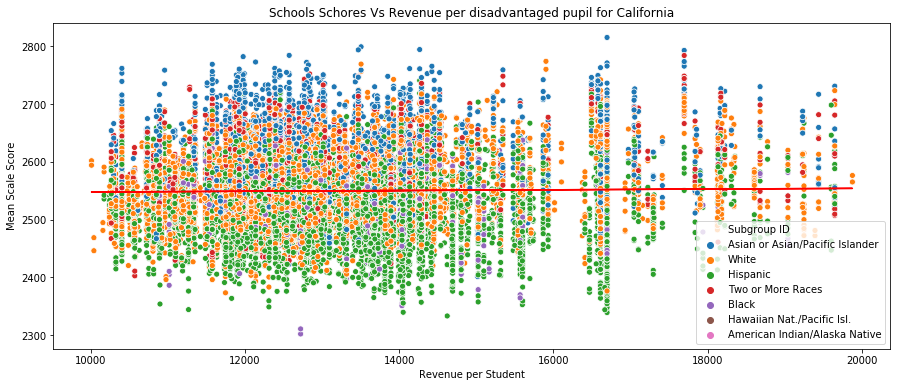

In [492]:
df_ndis_r=df_notDis[df_notDis['Total Revenue (TOTALREV) per Pupil ']>=10000]
a, b = best_fit(df_ndis_r['Total Revenue (TOTALREV) per Pupil '],df_ndis_r['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_ndis_r['Total Revenue (TOTALREV) per Pupil '],df_ndis_r['Mean Scale Score'],hue=df_ndis_r['Subgroup ID'])
yfit = [a + b * xi for xi in df_ndis_r['Total Revenue (TOTALREV) per Pupil ']]
plt.plot(df_ndis_r['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
plt.title('Schools Schores Vs Revenue per disadvantaged pupil for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

## After looking at these separately there seems to be a very flat impact for Disadvantaged students, while for Not Disadvantaged we see a slight positive correlation. Let's see it in numbers

In [493]:
#Correlation for non disadvantaged students
corr_columns = ['School Name', 'District Name', 'District Code_x',
        'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= df_notDis.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

In [494]:
#Correlation for non disadvantaged students
corr_columns = ['School Name', 'District Name', 'District Code_x',
        'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= df_dis.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

In [495]:
#df.columns

## Looking at separate disadvantaged students scores vs school enrollment

best fit line:
y = 2461.7042 + 0.0522x


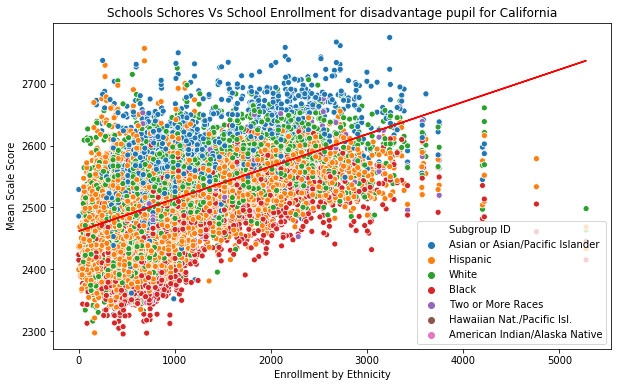

In [496]:
a, b = best_fit(df_dis['Count Enrollment per ethnicity'],df_dis['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df_dis['Total Enrollment'],df_dis['Mean Scale Score'], hue=df_dis['Subgroup ID'])
yfit = [a + b * xi for xi in df_dis['Total Enrollment']]
plt.plot(df_dis['Total Enrollment'], yfit, color='red')
plt.title('Schools Schores Vs School Enrollment for disadvantage pupil for California')
plt.xlabel('Enrollment by Ethnicity')
_=plt.ylabel('Mean Scale Score')

best fit line:
y = 2544.9579 + 0.0144x


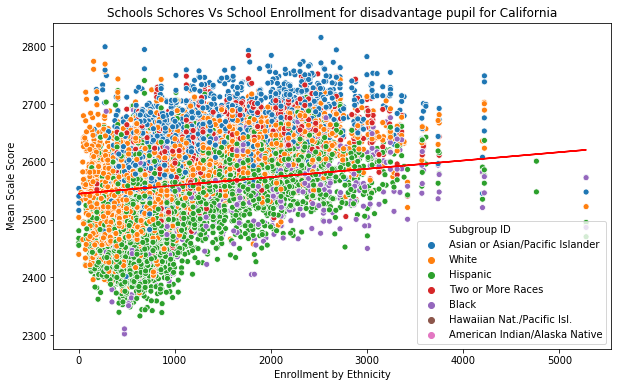

In [497]:
a, b = best_fit(df_notDis['Count Enrollment per ethnicity'],df_notDis['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df_notDis['Total Enrollment'],df_notDis['Mean Scale Score'], hue=df_notDis['Subgroup ID'])
yfit = [a + b * xi for xi in df_notDis['Total Enrollment']]
plt.plot(df_notDis['Total Enrollment'], yfit, color='red')
plt.title('Schools Schores Vs School Enrollment for disadvantage pupil for California')
plt.xlabel('Enrollment by Ethnicity')
_=plt.ylabel('Mean Scale Score')

## Visualize the Student/Teacher Ratio against students scores

best fit line:
y = 2474.1292 + 0.2635x


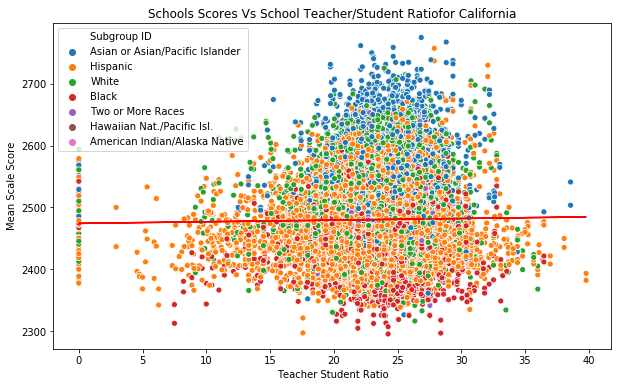

In [498]:
df_ts=df_dis[df_dis['Pupil/Teacher Ratio']<40]
a, b = best_fit(df_ts['Pupil/Teacher Ratio'],df_ts['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df_ts['Pupil/Teacher Ratio'],df_ts['Mean Scale Score'], hue=df_ts['Subgroup ID'])
yfit = [a + b * xi for xi in df_ts['Pupil/Teacher Ratio']]
plt.plot(df_ts['Pupil/Teacher Ratio'], yfit, color='red')
plt.title('Schools Scores Vs School Teacher/Student Ratiofor California')
plt.xlabel('Teacher Student Ratio')
_=plt.ylabel('Mean Scale Score')

### It would look to have a slight positive impact the size of the student/teacher ratio, with higher than 35 to be below the bar.

--------------------

## Black and Hispanic students have the lower scores and the impact other factors doesn't seem to impact greatly being disadvantaged. 
## What percentage of students of each ethnicity are Disadvantaged and is revenue and expense of some impact.

In [499]:
df.columns

Index(['School Name', 'District Name', 'District Code_x', 'Total Enrollment',
       'Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
       'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       '

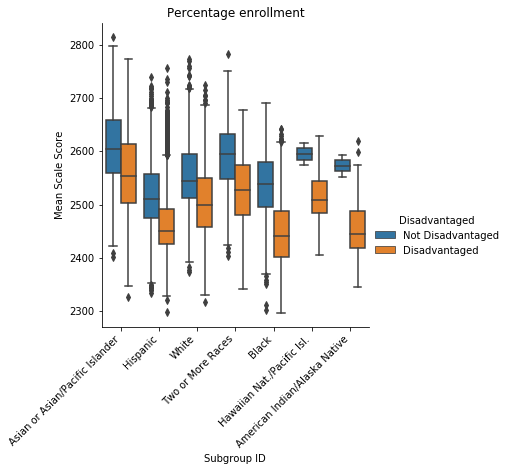

In [500]:
sns.catplot(x="Subgroup ID", y='Mean Scale Score', hue='Disadvantaged',kind="box", data=df_revenue)
plt.xticks(rotation=45, ha='right')
_=plt.title('Percentage enrollment')

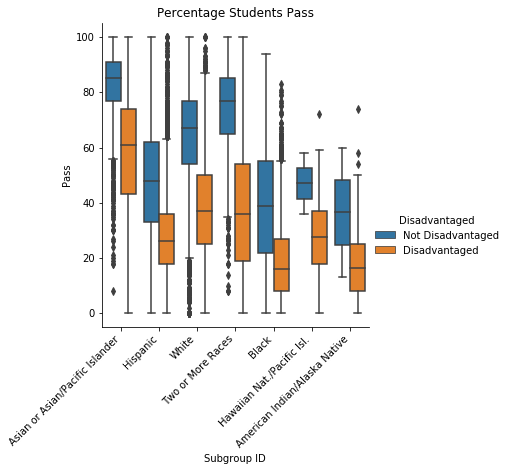

In [501]:
sns.catplot(x="Subgroup ID", y="Pass", hue="Disadvantaged", kind="box", data=df)
plt.xticks(rotation=45, ha='right')
_=plt.title('Percentage Students Pass')

## Looking at the ethnicities with lower scores, and how the revenue per student impacts them, we can see that lower than 12000 per student the scores trend is positive. After 12000 it becomes negative.

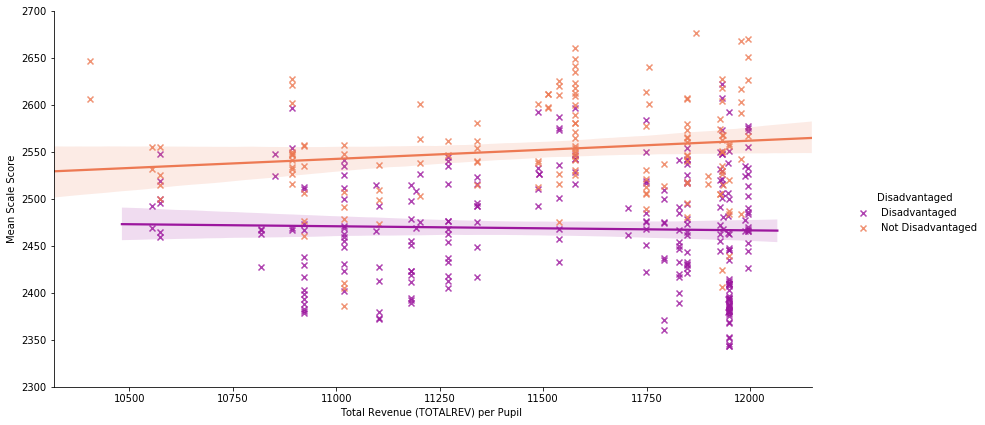

In [502]:
black_df=df[df['Subgroup ID']=='Black']
black_df=black_df[black_df['Total Revenue (TOTALREV) per Pupil ']<=12000]
g = sns.FacetGrid(black_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Revenue (TOTALREV) per Pupil ', 'Mean Scale Score',marker="x")
_=g.set(#xlim=(10000, 20000), 
    ylim=(2300, 2700))
g.add_legend()

In [503]:
df_corr= black_df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

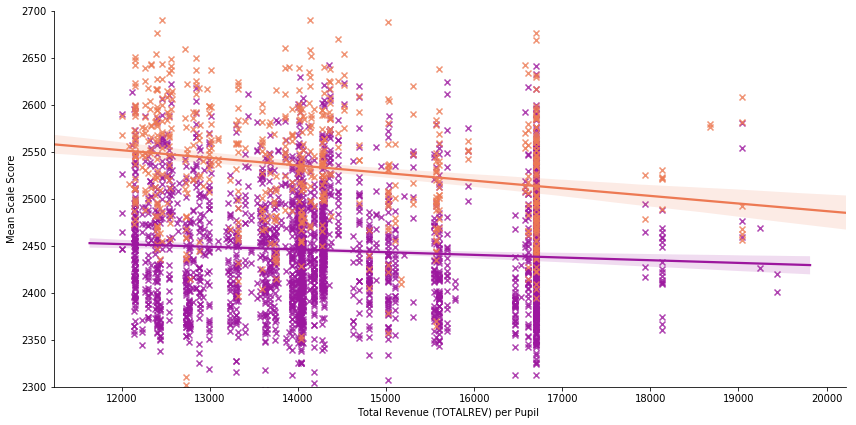

In [504]:
hf_black_df=df[df['Subgroup ID']=='Black']
hf_black_df=hf_black_df[hf_black_df['Total Revenue (TOTALREV) per Pupil ']>12000]
g = sns.FacetGrid(hf_black_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Revenue (TOTALREV) per Pupil ', 'Mean Scale Score',marker="x")
_=g.set(#xlim=(10000, 20000), 
    ylim=(2300, 2700))

In [505]:
df_corr= hf_black_df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

In [339]:
# black_ndis_df=black_df[black_df['Disadvantaged']=='Not Disadvantaged']
# a, b = best_fit(black_ndis_df['Total Revenue (TOTALREV) per Pupil '],black_ndis_df['Mean Scale Score'])
# sns.scatterplot(black_ndis_df['Total Revenue (TOTALREV) per Pupil '],black_ndis_df['Mean Scale Score'])
# yfit = [a + b * xi for xi in black_ndis_df['Total Revenue (TOTALREV) per Pupil ']]
# plt.plot(black_ndis_df['Total Revenue (TOTALREV) per Pupil '], yfit, color='red')
# plt.title('Scores of Black non disadvantaged students vs Revenue per Student')
# plt.xlabel('Revenue per Student')
# _=plt.ylabel('Mean Scale Score')

In [340]:
# black_df=df[df['Subgroup ID']=='Black']
# black_ndis_df=black_df[black_df['Disadvantaged']=='Not Disadvantaged']
# a, b = best_fit(black_ndis_df['Count Enrollment per ethnicity'],black_ndis_df['Mean Scale Score'])
# sns.scatterplot(black_ndis_df['Count Enrollment per ethnicity'],black_ndis_df['Mean Scale Score'])
# yfit = [a + b * xi for xi in black_ndis_df['Count Enrollment per ethnicity']]
# plt.plot(black_ndis_df['Count Enrollment per ethnicity'], yfit, color='red')
# plt.title('Scores of Black non disadvantaged students vs Student Enrollment')
# plt.xlabel('Revenue per Student')
# _=plt.ylabel('Mean Scale Score')

In [286]:
#df.columns

### Let's look at not disadvantaged Hispanic Students performance.

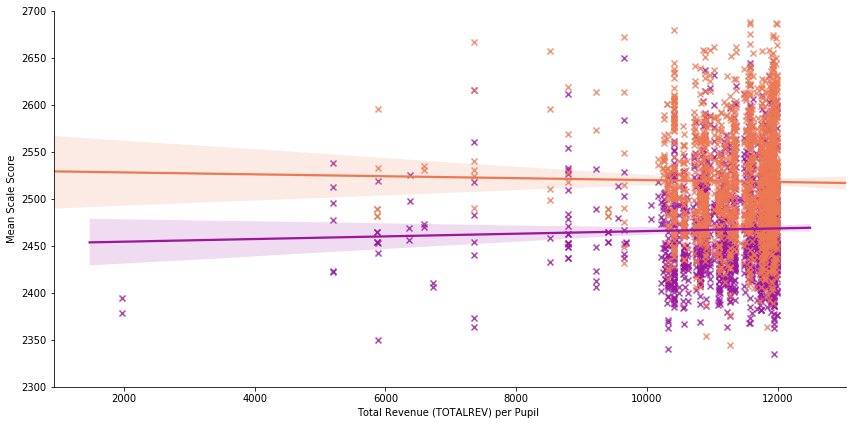

In [506]:
hispanic_df=df[df['Subgroup ID']=='Hispanic']
hispanic_df=hispanic_df[hispanic_df['Total Revenue (TOTALREV) per Pupil ']<=12000]
g = sns.FacetGrid(hispanic_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Revenue (TOTALREV) per Pupil ', 'Mean Scale Score',marker="x")
_=g.set(#xlim=(10000, 20000), 
    ylim=(2300, 2700))


In [507]:
df_corr= hispanic_df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

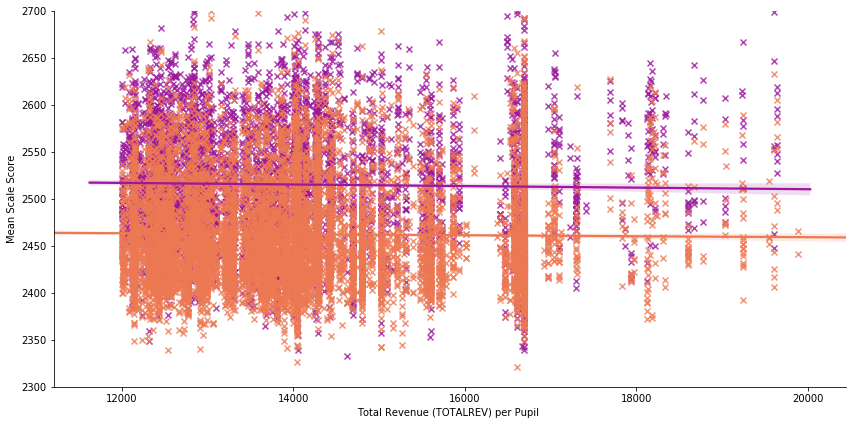

In [508]:
hf_hispanic_df=df[df['Subgroup ID']=='Hispanic']
hf_hispanic_df=hf_hispanic_df[hf_hispanic_df['Total Revenue (TOTALREV) per Pupil ']>12000]
g = sns.FacetGrid(hf_hispanic_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Revenue (TOTALREV) per Pupil ', 'Mean Scale Score',marker="x")
_=g.set(#xlim=(10000, 20000), 
    ylim=(2300, 2700))

In [509]:
df_corr= hf_hispanic_df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

## Let us understand how is that money spent.

In [510]:
df.columns

Index(['School Name', 'District Name', 'District Code_x', 'Total Enrollment',
       'Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
       'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       '

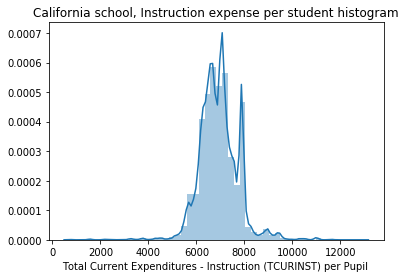

In [511]:
plt.figure(figsize=(6,4))
sns.distplot(df['Total Current Expenditures - Instruction (TCURINST) per Pupil '])
plt.title('California school, Instruction expense per student histogram')
plt.show()

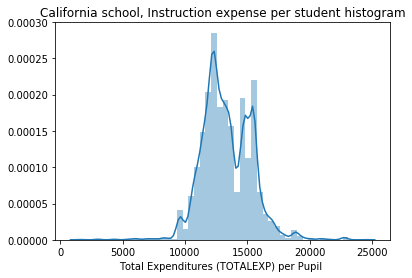

In [512]:
plt.figure(figsize=(6,4))
sns.distplot(df['Total Expenditures (TOTALEXP) per Pupil '])
plt.title('California school, Instruction expense per student histogram')
plt.show()

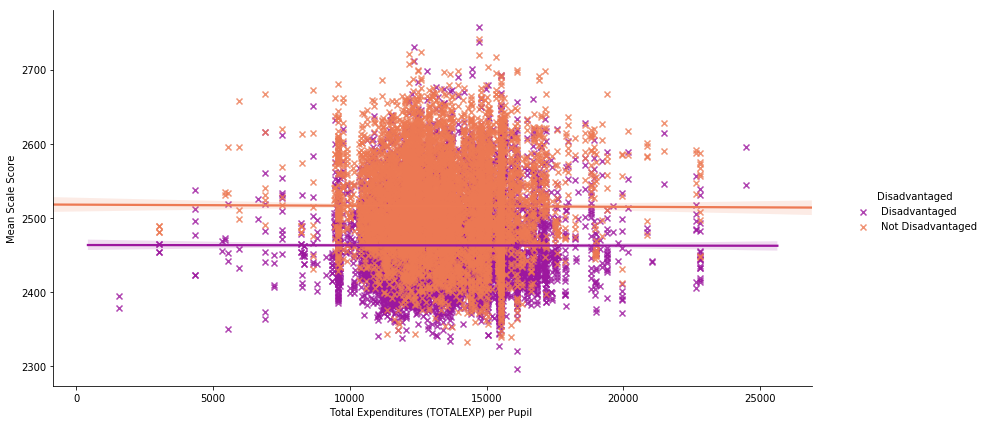

In [526]:
hispanic_df=df[df['Subgroup ID']=='Hispanic']
#hispanic_df=hispanic_df[hispanic_df['Total Expenditures (TOTALEXP) per Pupil ']>10000]
g = sns.FacetGrid(hispanic_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Expenditures (TOTALEXP) per Pupil ', 'Mean Scale Score',marker="x")
#_=g.set(#xlim=(10000, 20000), 
 #   ylim=(2300, 2700))
g.add_legend()

In [533]:

hispanic_df=hispanic_df[hispanic_df['Disadvantaged']=='Disadvantaged']
df_corr= hispanic_df.drop(columns= corr_cols)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

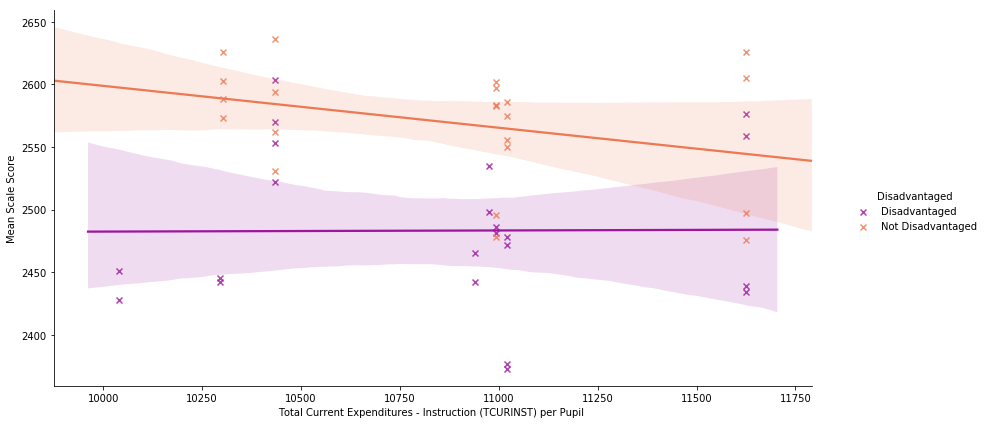

In [524]:
hispanic_df=df[df['Subgroup ID']=='Hispanic']
hispanic_df=hispanic_df[hispanic_df['Total Current Expenditures - Instruction (TCURINST) per Pupil ']>10000]
g = sns.FacetGrid(hispanic_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Current Expenditures - Instruction (TCURINST) per Pupil ', 'Mean Scale Score',marker="x")
#_=g.set(#xlim=(10000, 20000), 
 #   ylim=(2300, 2700))
g.add_legend()

In [530]:
corr_cols=['School Name', 'District Name', 'District Code_x',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ', 'Subgroup ID',
       'Count Enrollment per ethnicity', 'County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code',
       'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= hispanic_df.drop(columns= corr_cols)
corr=df_corr.corr()
corr.style.background_gradient(cmap='PiYG')

In [381]:
#top_revenue = df[df['Total Revenue (TOTALREV) per Pupil ']>12000]

In [407]:
cut_labels = ['Less12K','More12K']
cut_bins = [0, 12000,50000]
df['revenuePstudent'] = pd.cut(df['Total Revenue (TOTALREV) per Pupil '], bins=cut_bins, labels=cut_labels)

In [441]:
#titanic.groupby(['sex','survived']).agg({'fare':'count','age':'mean'}).reset_index()

enrollment=pd.pivot_table(df, index=['Disadvantaged','revenuePstudent','Subgroup ID'], values=['Count Enrollment per ethnicity'], aggfunc=np.sum).reset_index()
enrollment

Disadvantaged revenuePstudent                      Subgroup ID  \
0       Disadvantaged         Less12K    American Indian/Alaska Native   
1       Disadvantaged         Less12K  Asian or Asian/Pacific Islander   
2       Disadvantaged         Less12K                            Black   
3       Disadvantaged         Less12K                         Hispanic   
4       Disadvantaged         Less12K                Two or More Races   
5       Disadvantaged         Less12K                            White   
6       Disadvantaged         More12K    American Indian/Alaska Native   
7       Disadvantaged         More12K  Asian or Asian/Pacific Islander   
8       Disadvantaged         More12K                            Black   
9       Disadvantaged         More12K       Hawaiian Nat./Pacific Isl.   
10      Disadvantaged         More12K                         Hispanic   
11      Disadvantaged         More12K                Two or More Races   
12      Disadvantaged         More12K                            White   
13  Not Disadvantaged         Less12K  Asian or Asian/Pacific Islander   
14  Not Disadvantaged         Less12K                            Black   
15  Not Disadvantaged         Less12K                         Hispanic   
16  Not Disadvantaged         Less12K                Two or More Races   
17  Not Disadvantaged         Less12K                            White   
18  Not Disadvantaged         More12K    American Indian/Alaska Native   
19  Not Disadvantaged         More12K  Asian or Asian/Pacific Islander   
20  Not Disadvantaged         More12K                            Black   
21  Not Disadvantaged         More12K       Hawaiian Nat./Pacific Isl.   
22  Not Disadvantaged         More12K                         Hispanic   
23  Not Disadvantaged         More12K                Two or More Races   
24  Not Disadvantaged         More12K                            White   

    Count Enrollment per ethnicity  
0                             76.0  
1                          76144.0  
2                          31736.0  
3                         618482.0  
4                           4514.0  
5                         457320.0  
6                           3714.0  
7                         555962.0  
8                         320518.0  
9                           1990.0  
10                       4707261.0  
11                         20705.0  
12                       1012987.0  
13                        201543.0  
14                         18262.0  
15                        533981.0  
16                         44722.0  
17                        650534.0  
18                           114.0  
19                        652438.0  
20                        129675.0  
21                           120.0  
22                       3164185.0  
23                         96926.0  
24                       1414590.0

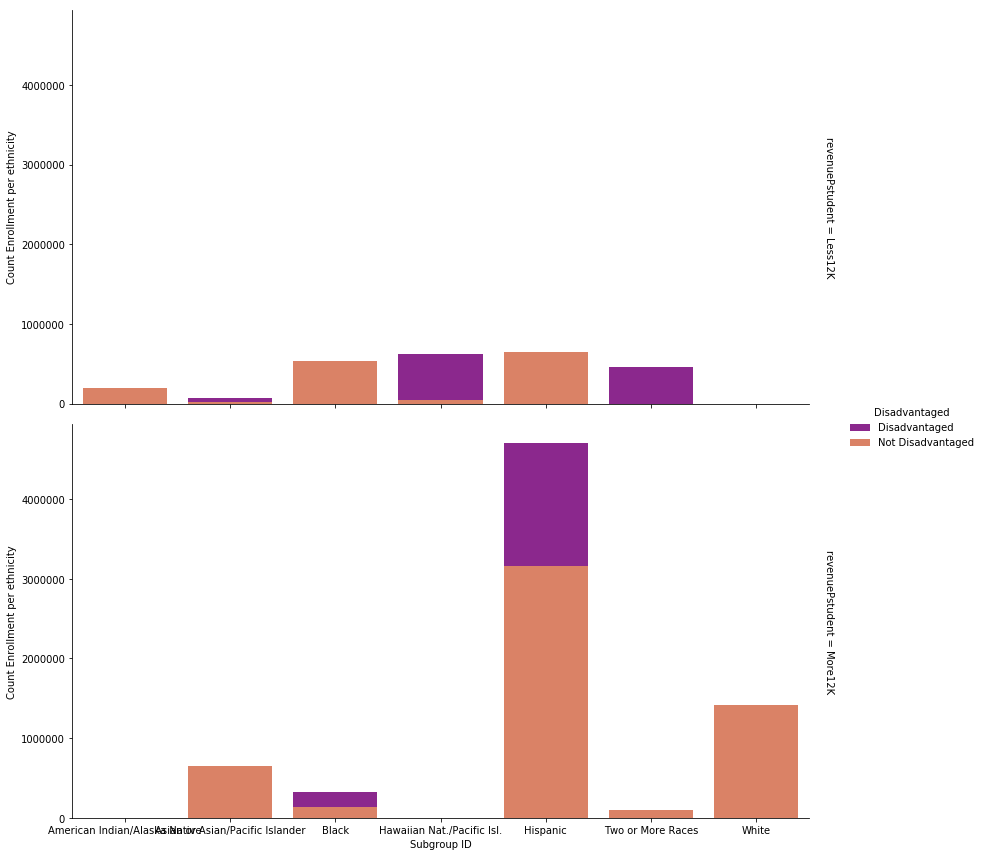

In [459]:
g = sns.FacetGrid(enrollment,hue='Disadvantaged', row= 'revenuePstudent',margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(
sns.barplot,'Subgroup ID','Count Enrollment per ethnicity')
#g.set(xlim=(100000,4000000))
_=g.add_legend()

In [393]:
cut_labels = ['Less12K','More12K']
cut_bins = [0, 12000,50000]
df['expensePstudent'] = pd.cut(df['Total Expenditures (TOTALEXP) per Pupil '], bins=cut_bins, labels=cut_labels)
pd.pivot_table(top_revenue, index=['District Name'],values=['Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil '], aggfunc=np.sum)

Instructional Expenditures (E13) per Pupil   \
District Name                                                                     
ABC UNIFIED                                                           1392352.0   
ACALANES UNION HIGH                                                    273598.0   
ADELANTO ELEMENTARY                                                    565984.0   
ALAMEDA COUNTY OFFICE OF EDUCATION                                       5000.0   
ALAMEDA UNIFIED                                                        788160.0   
ALBANY CITY UNIFIED                                                    406700.0   
ALEXANDER VALLEY UNION ELEMENTARY                                       23030.0   
ALHAMBRA UNIFIED                                                       841340.0   
ALISAL UNION                                                           214770.0   
ALTA VISTA ELEMENTARY                                                   30616.0   
ALUM ROCK UNION ELEMENTARY                                             578437.0   
ALVORD UNIFIED                                                         970788.0   
ANAHEIM ELEMENTARY                                                     571920.0   
ANAHEIM UNION HIGH                                                    1764834.0   
ANDERSON UNION HIGH                                                    117072.0   
ANDERSON VALLEY UNIFIED                                                 20592.0   
ANTELOPE VALLEY UNION HIGH                                             970496.0   
ANTIOCH UNIFIED                                                       1297518.0   
ARCADIA UNIFIED                                                        635096.0   
ARCATA ELEMENTARY                                                       55008.0   
ARVIN UNION                                                             54144.0   
ATASCADERO UNIFIED                                                     293216.0   
ATWATER ELEMENTARY                                                     320996.0   
AUBURN UNION ELEMENTARY                                                 75946.0   
AZUSA UNIFIED                                                          412000.0   
BAKERSFIELD CITY                                                      1603980.0   
BALDWIN PARK UNIFIED                                                   393096.0   
BALLARD ELEMENTARY                                                      25830.0   
BANNING UNIFIED                                                        299013.0   
BARSTOW UNIFIED                                                        423060.0   
...                                                                         ...   
WASCO UNION HIGH                                                        61420.0   
WASHINGTON COLONY ELEMENTARY                                            14154.0   
WASHINGTON UNIFIED                                                    1087716.0   
WAUKENA JOINT UNION ELEMENTARY                                          12792.0   
WEAVER UNION                                                           187226.0   
WEED UNION ELEMENTARY                                                   32552.0   
WEST CONTRA COSTA UNIFIED                                             1858960.0   
WEST PARK ELEMENTARY                                                    25416.0   
WEST SONOMA COUNTY UNION HIGH                                          135269.0   
WESTMINSTER                                                            824863.0   
WESTMORLAND UNION ELEMENTARY                                            13610.0   
WESTSIDE ELEMENTARY                                                     19272.0   
WHEATLAND                                                              145680.0   
WHEATLAND UNION HIGH                                                    53160.0   
WHITTIER CITY ELEMENTARY                                               306852.0   
WHITTIER UNION HIGH                                 

## Conclusions (as of now):
1. 

## Observations:
1. 

## NEXT STEPS:
1.